# Analisis Exploratorio de Datos

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist


In [70]:
Datos = pd.read_csv('./Mall_Customers.csv')

In [71]:
Datos.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [72]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Preprocesamiento de Datos

Text(0.5, 1.0, 'Identificación de Datos Edad')

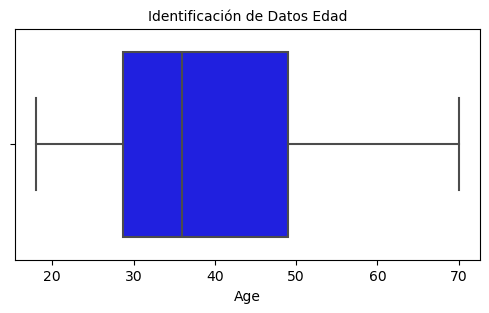

In [73]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'], color = "blue")
plt.title('Identificación de Datos Edad', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Ingresos Anuales')

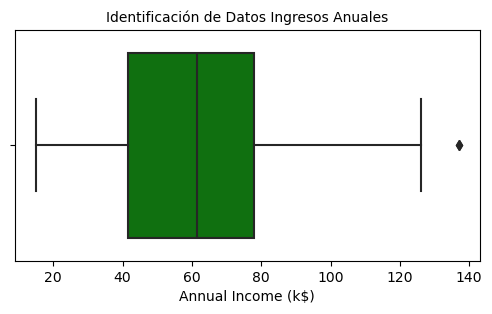

In [74]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'], color = "green")
plt.title('Identificación de Datos Ingresos Anuales', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Nivel de Gastos')

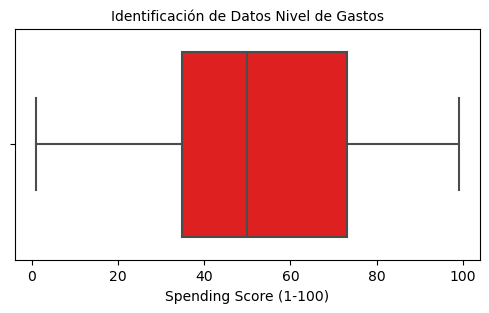

In [75]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'], color = "red")
plt.title('Identificación de Datos Nivel de Gastos', fontsize=10 )

In [76]:
print("Cantidad de Registros con cero en Age: ", Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual Income (k$): ", Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100): ", Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Annual Income (k$):  0
Cantidad de Registros con cero en Spending Score (1-100):  0


In [77]:
Datos['Annual Income (k$)'] = Datos['Annual Income (k$)'].replace(0, Datos['Annual Income (k$)'].mean())
Datos['Age'] = Datos['Age'].replace(0, Datos['Age'].mean())
Datos['Spending Score (1-100)'] = Datos['Spending Score (1-100)'].replace(0, Datos['Spending Score (1-100)'].min())

In [78]:
nivel_minimo = 1
nivel_maximo = 99
Total_Atipicos = ((Datos['Spending Score (1-100)'] < nivel_minimo) | (Datos['Spending Score (1-100)'] > nivel_maximo)).sum()
print("El total de datos atípicos en Nivel de Gastos es: {}".format(Total_Atipicos))

El total de datos atípicos en Nivel de Gastos es: 0


In [79]:
nivel_minimo = 18
nivel_maximo = 90
Total_Atipicos = ((Datos['Age'] < nivel_minimo) | (Datos['Age'] > nivel_maximo)).sum()
print("El total de datos atípicos para las Edades es: {}".format(Total_Atipicos))

El total de datos atípicos para las Edades es: 0


In [80]:
nivel_minimo = 7
nivel_maximo = 150
Total_Atipicos = ((Datos['Annual Income (k$)'] < nivel_minimo) | (Datos['Annual Income (k$)'] > nivel_maximo)).sum()
print("El total de datos atípicos en Ingresos Anuales es: {}".format(Total_Atipicos))

El total de datos atípicos en Ingresos Anuales es: 0


In [81]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Seleccion de Caracteristicas Relevantes

In [82]:
Datos = pd.read_csv('Mall_Customers.csv')
columnas_modelo = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
Datos = Datos[columnas_modelo]

In [83]:
Datos.head(20)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


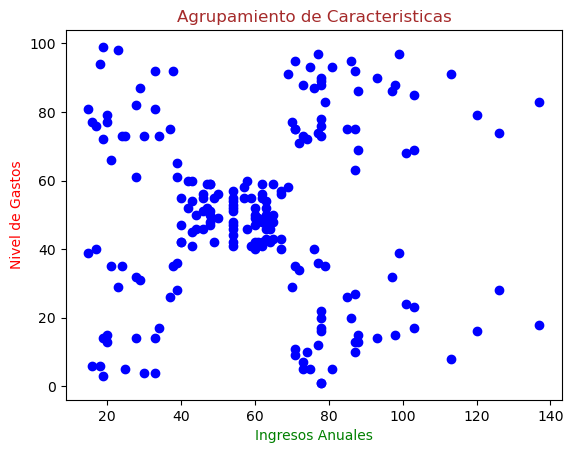

In [84]:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], color = "blue")
plt.xlabel('Ingresos Anuales', color = "green")
plt.ylabel('Nivel de Gastos', color = "red")
plt.title('Agrupamiento de Caracteristicas', color = "brown")
plt.show()

# Entrenamiento del Modelo

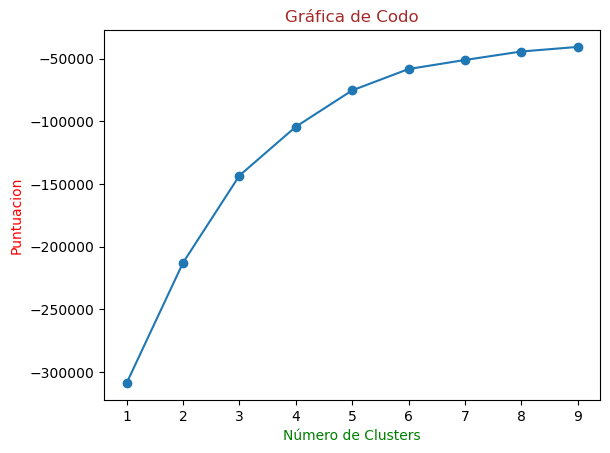

In [85]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters', color = "green")
plt.ylabel('Puntuacion', color = "red")
plt.title('Gráfica de Codo', color = "brown")
plt.show()

In [86]:
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [87]:
Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      0
1     21                  15                      81      4
2     20                  16                       6      0
3     23                  16                      77      4
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


# Evaluar el Desempeño del Modelo

In [88]:
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))



+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.44428597560893024 |
| Indice Calinski Harabasz | 151.04386000160667  |
|  Indice Davies Bouldin   | 0.8218781633199782  |
+--------------------------+---------------------+


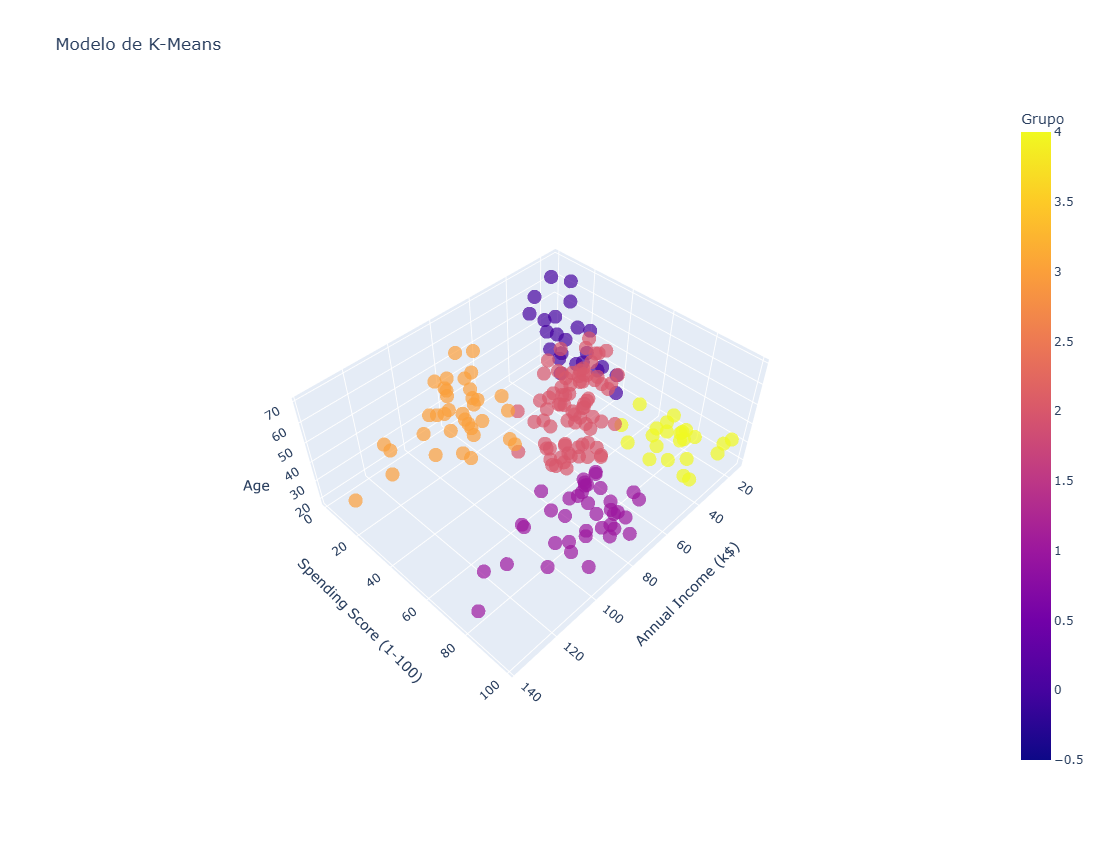

In [105]:
Grafico = px.scatter_3d(Datos, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means', labels={'Label': 'Cluster'}, color_discrete_map={})
Grafico.update_layout(showlegend=False)

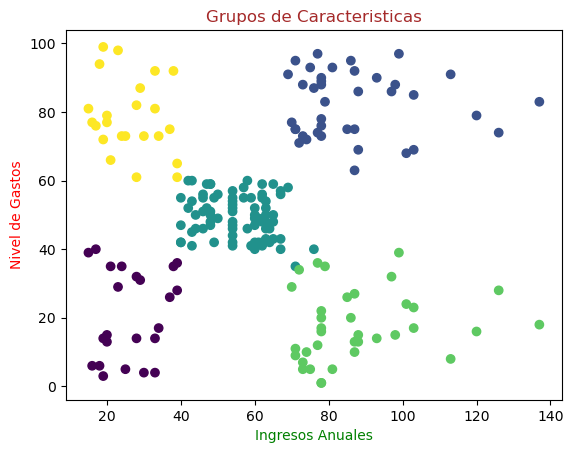

In [107]:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Ingresos Anuales', color = "green")
plt.ylabel('Nivel de Gastos', color = "red")
plt.title('Grupos de Caracteristicas', color = "brown")
plt.show()

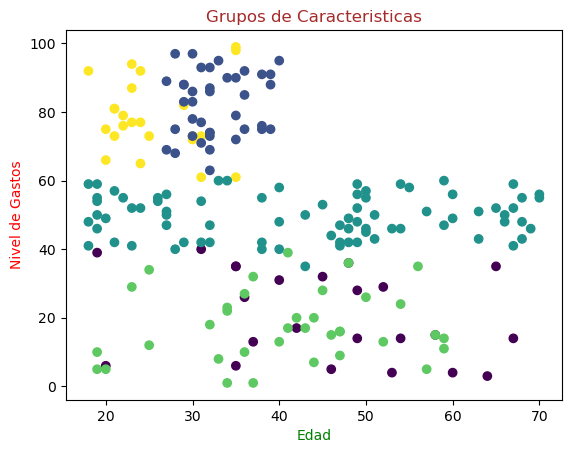

In [163]:
plt.scatter(Datos['Age'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Edad', color = "green")
plt.ylabel('Nivel de Gastos', color = "red")
plt.title('Grupos de Caracteristicas', color = "brown")
plt.show()

# Hierarchical Clustering

In [166]:
data = pd.read_csv('C:\\Users\juan2\Downloads\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv')

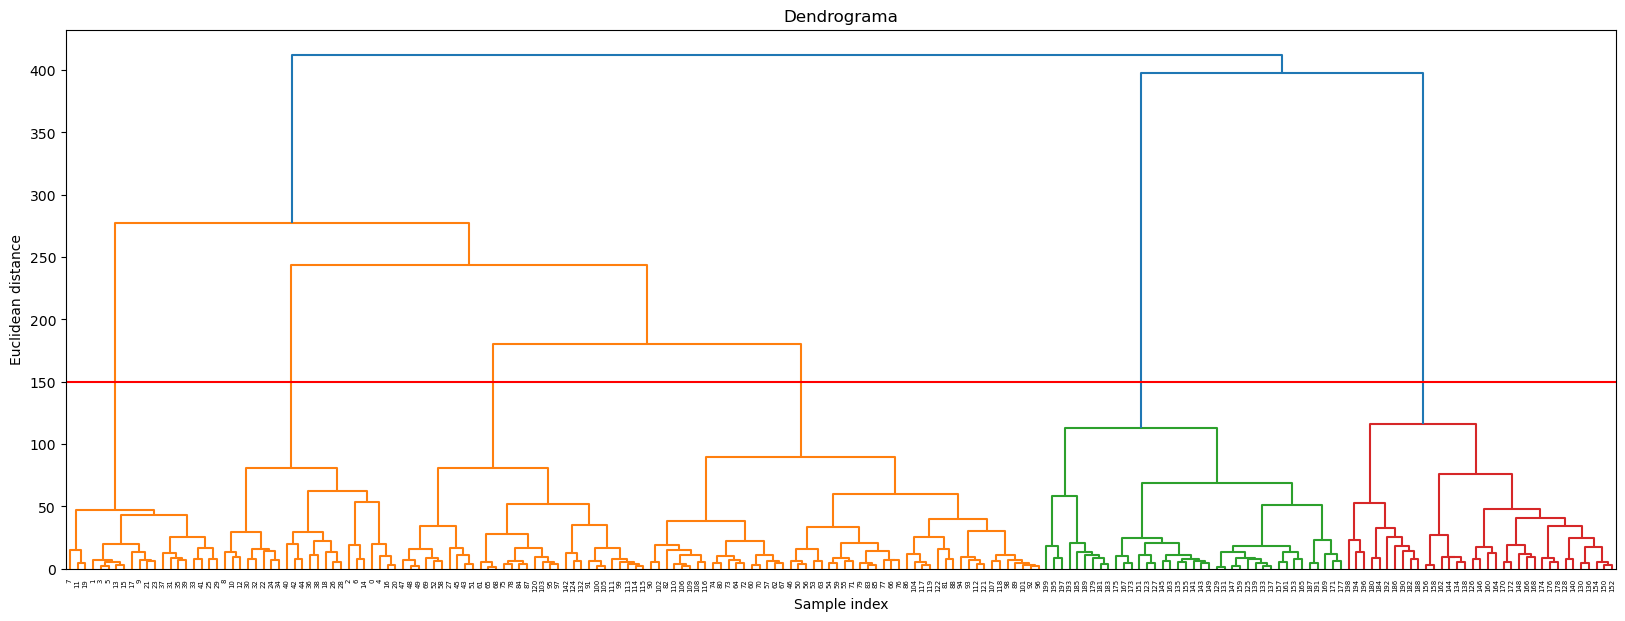

In [167]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 150, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [168]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [192]:
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

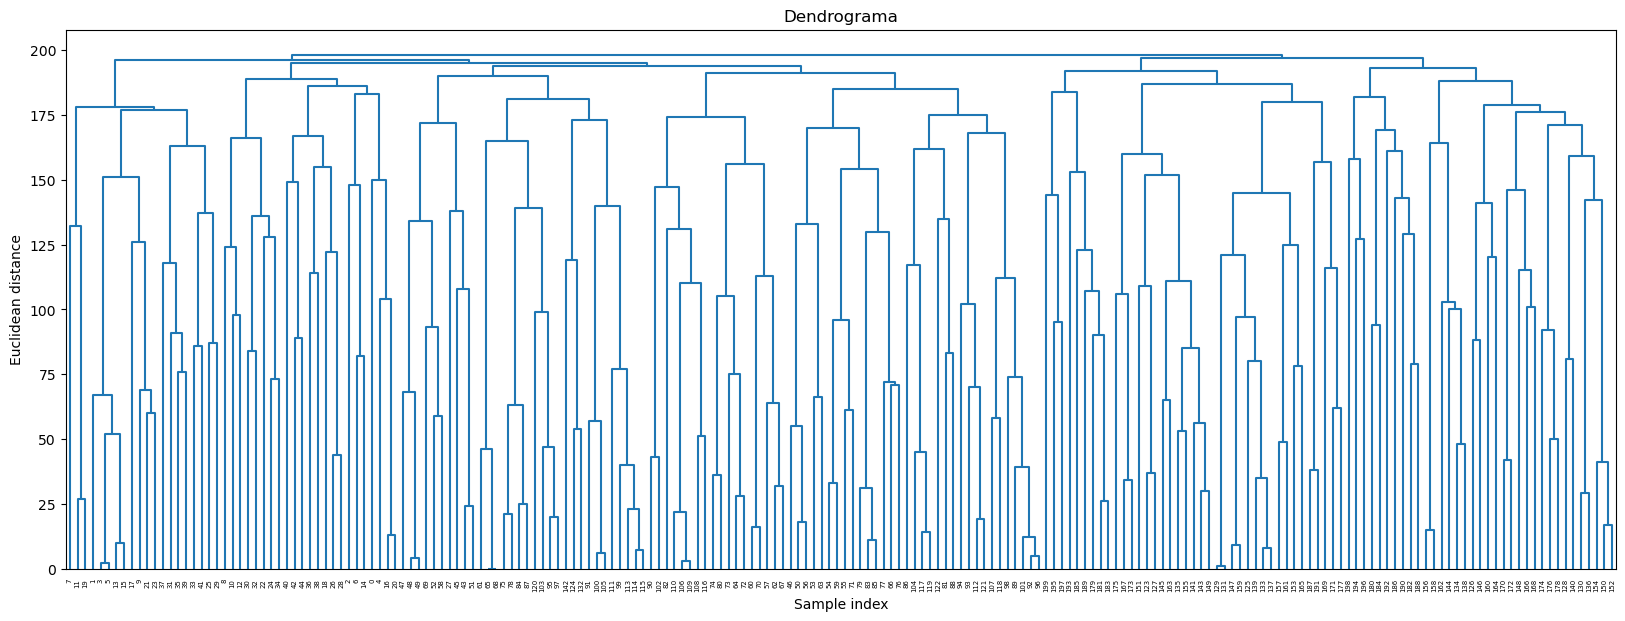

In [193]:
plot_dendrogram(hier_clustering, color_threshold=0)

In [169]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [170]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [171]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [183]:
data.dropna(inplace = True)

In [184]:
X = data.iloc[:, 2:]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [189]:
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X_scaled, data['Gender'])

In [186]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_selected)
kmeans_labels = kmeans.labels_

In [176]:
silhouette_kmeans = silhouette_score(X_selected, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(X_selected, kmeans_labels)

In [177]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(X_selected)
agglo_labels = agglo.labels_

In [178]:
silhouette_agglo = silhouette_score(X_selected, agglo_labels)
calinski_agglo = calinski_harabasz_score(X_selected, agglo_labels)

In [179]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Feature 2')

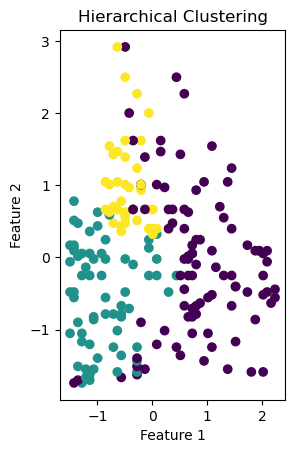

In [180]:
plt.subplot(1, 2, 2)
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=agglo_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [181]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [182]:
print("Hierarchical Clustering Silhouette Score:", silhouette_agglo)
print("Hierarchical Clustering Calinski-Harabasz Score:", calinski_agglo)

Hierarchical Clustering Silhouette Score: 0.32148866683112387
Hierarchical Clustering Calinski-Harabasz Score: 88.10174149244529
